In [1]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set()
from datetime import datetime, time
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
geo = pd.read_csv('Geo.cs')
instance = pd.read_csv(r"C:\Users\Sid's Lappy\Downloads\Banking and finance project\instance_scores.csv")
lambdawts = pd.read_csv(r"C:\Users\Sid's Lappy\Downloads\Banking and finance project\Lambda_wts.csv")
qset = pd.read_csv(r"C:\Users\Sid's Lappy\Downloads\Banking and finance project\Qset_tats.csv")
test = pd.read_csv(r"C:\Users\Sid's Lappy\Downloads\Banking and finance project\test_share.csv")
train = pd.read_csv(r"C:\Users\Sid's Lappy\Downloads\Banking and finance project\train.csv")

In [87]:
os.getcwd()

"C:\\Users\\Sid's Lappy\\Documents\\Python Programming\\ML projects with Sundaram sir"

In [86]:
instance = pd.read_csv('instance_scores.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'instance_scores.csv'

In [15]:
geo

,geo_score
id,
0,-0.62
1,1.07
2,0.07
3,0.18
4,0.54
...,...
284802,2.71
284803,0.92
284804,0.06


In [4]:
geo.shape

(1424035, 2)

In [5]:
geo['id'].nunique()

284807

In [6]:
geo.isnull().sum() / len(geo) * 100

id           0.000000
geo_score    5.023964
dtype: float64

In [7]:
# impute as only 5 % data is missing
geo.describe()

,id,geo_score
count,1.424035e+06,1.352492e+06
mean,1.424030e+05,-9.279168e-06
std,8.221673e+04,7.827199e+00
min,0.000000e+00,-1.093900e+02
25%,7.120100e+04,-5.860000e+00
50%,1.424030e+05,1.800000e-01
75%,2.136050e+05,5.860000e+00
max,2.848060e+05,4.581000e+01


In [8]:
geo.fillna(0, inplace = True)

In [9]:
geo.isnull().sum()

id           0
geo_score    0
dtype: int64

In [10]:
geo = geo.groupby('id').mean()

In [11]:
geo.shape

(284807, 1)

In [14]:
geo = geo['id'].nunique()

KeyError: 'id'

In [ ]:
instance.head(3)

In [18]:
instance.shape

(1424035, 2)

In [19]:
instance['id'].nunique()

284807

In [36]:
instance.isnull().sum()

id                 0
instance_scores    0
dtype: int64

In [17]:
instance = instance.groupby('id').mean()

In [18]:
instance.shape

(284807, 1)

In [12]:
lambdawts.head(3)

,Group,lambda_wt
0,Grp936,3.41
1,Grp347,-2.88
2,Grp188,0.39


In [20]:
lambdawts.shape

(1400, 2)

In [21]:
lambdawts['Group'].nunique()

1400

In [37]:
lambdawts.isnull().sum()

Group        0
lambda_wt    0
dtype: int64

In [13]:
qset.head(3)

,id,qsets_normalized_tat
0,9983,2.41
1,266000,3.10
2,77525,1.03


In [22]:
qset.shape

(1424035, 2)

In [23]:
qset['id'].nunique()

284807

In [40]:
qset.isnull().sum() / len(qset) * 100

id                      0.000000
qsets_normalized_tat    7.247083
dtype: float64

In [41]:
qset.describe()

,id,qsets_normalized_tat
count,1.424035e+06,1.320834e+06
mean,1.424030e+05,1.094006e-05
std,8.221673e+04,7.731794e+00
min,0.000000e+00,-1.404400e+02
25%,7.120100e+04,-5.860000e+00
50%,1.424030e+05,2.000000e-02
75%,2.136050e+05,5.860000e+00
max,2.848060e+05,6.110000e+01


<AxesSubplot:ylabel='qsets_normalized_tat'>

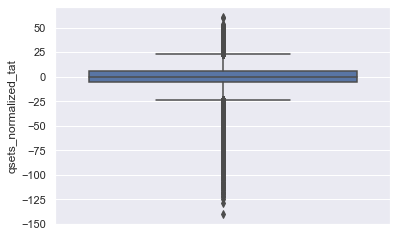

In [42]:
sns.boxplot(y = 'qsets_normalized_tat', data = qset)

In [43]:
qset.fillna(0, inplace = True)

In [44]:
qset.isnull().sum()

id                      0
qsets_normalized_tat    0
dtype: int64

In [20]:
qset = qset.groupby('id').mean()
qset

,qsets_normalized_tat
id,
0,0.2625
1,-0.1100
2,1.1100
3,-0.8500
4,-0.2400
...,...
284802,1.9900
284803,-0.0375
284804,0.3100


In [21]:
qset.shape

(284807, 1)

In [14]:
test.head(3)

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem7,Dem8,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT
0,146574,Grp229,-0.300000,1.540000,0.22,-0.280000,0.570000,0.260000,0.70,1.076667,...,0.786667,0.546667,0.313333,0.703333,0.813333,0.776667,0.796667,0.823333,0.783333,-249.7500
1,268759,Grp141,0.633333,0.953333,0.81,0.466667,0.910000,0.253333,1.04,0.550000,...,0.636667,0.770000,0.993333,0.536667,0.703333,0.806667,0.630000,0.673333,0.673333,-249.8125
2,59727,Grp188,1.043333,0.740000,0.86,1.006667,0.583333,0.616667,0.63,0.686667,...,0.626667,0.756667,0.953333,0.623333,0.753333,0.870000,0.596667,0.680000,0.670000,-248.1200


In [24]:
test.shape

(56962, 27)

In [25]:
test['id'].nunique()

56962

In [26]:
test['Group'].nunique()

915

In [45]:
test.isnull().sum()

id                0
Group             0
Per1              0
Per2              0
Per3              0
Per4              0
Per5              0
Per6              0
Per7              0
Per8              0
Per9              0
Dem1              0
Dem2              0
Dem3              0
Dem4              0
Dem5              0
Dem6              0
Dem7              0
Dem8              0
Dem9              0
Cred1             0
Cred2             0
Cred3             0
Cred4             0
Cred5             0
Cred6             0
Normalised_FNT    0
dtype: int64

In [15]:
train.head(3)

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem8,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,...,0.680000,0.726667,0.606667,1.010000,0.933333,0.603333,0.686667,0.673333,-245.750,0
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,...,0.716667,0.743333,0.680000,0.690000,0.560000,0.670000,0.553333,0.653333,-248.000,0
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,...,0.690000,0.820000,0.600000,0.383333,0.763333,0.670000,0.686667,0.673333,-233.125,0


In [27]:
train.shape

(227845, 28)

In [28]:
train['id'].nunique()

227845

In [29]:
train['Group'].nunique()

1301

In [48]:
train.isnull().sum()

id                0
Group             0
Per1              0
Per2              0
Per3              0
Per4              0
Per5              0
Per6              0
Per7              0
Per8              0
Per9              0
Dem1              0
Dem2              0
Dem3              0
Dem4              0
Dem5              0
Dem6              0
Dem7              0
Dem8              0
Dem9              0
Cred1             0
Cred2             0
Cred3             0
Cred4             0
Cred5             0
Cred6             0
Normalised_FNT    0
Target            0
dtype: int64

In [50]:
train.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
227840    False
227841    False
227842    False
227843    False
227844    False
Length: 227845, dtype: bool

In [22]:
train.shape

(227845, 28)

In [23]:
train['data'] = 'train'

In [24]:
train.shape

(227845, 29)

In [26]:
train.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,data
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,...,0.726667,0.606667,1.010000,0.933333,0.603333,0.686667,0.673333,-245.7500,0,train
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,...,0.743333,0.680000,0.690000,0.560000,0.670000,0.553333,0.653333,-248.0000,0,train
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,...,0.820000,0.600000,0.383333,0.763333,0.670000,0.686667,0.673333,-233.1250,0,train
3,50806,Grp198,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,...,0.900000,0.680000,0.846667,0.423333,0.520000,0.846667,0.760000,-249.7775,0,train
4,184244,Grp228,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,...,0.486667,0.693333,0.526667,0.520000,0.716667,0.706667,0.673333,-247.5775,0,train


In [27]:
test.shape

(56962, 27)

In [28]:
test['data'] = 'test'

In [29]:
test.shape

(56962, 28)

In [30]:
test.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem8,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,data
0,146574,Grp229,-0.300000,1.540000,0.220000,-0.280000,0.570000,0.260000,0.700000,1.076667,...,0.546667,0.313333,0.703333,0.813333,0.776667,0.796667,0.823333,0.783333,-249.7500,test
1,268759,Grp141,0.633333,0.953333,0.810000,0.466667,0.910000,0.253333,1.040000,0.550000,...,0.770000,0.993333,0.536667,0.703333,0.806667,0.630000,0.673333,0.673333,-249.8125,test
2,59727,Grp188,1.043333,0.740000,0.860000,1.006667,0.583333,0.616667,0.630000,0.686667,...,0.756667,0.953333,0.623333,0.753333,0.870000,0.596667,0.680000,0.670000,-248.1200,test
3,151544,Grp426,1.283333,0.300000,0.576667,0.636667,0.256667,0.543333,0.356667,0.663333,...,0.460000,0.260000,0.800000,0.606667,0.456667,0.320000,0.676667,0.660000,-222.9875,test
4,155008,Grp443,1.186667,0.326667,0.476667,0.866667,0.436667,0.680000,0.476667,0.686667,...,0.740000,0.823333,0.670000,0.896667,0.566667,0.546667,0.650000,0.663333,-196.2200,test


In [32]:
all_data = pd.concat([train, test], axis = 0)

In [33]:
all_data.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,data
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,...,0.726667,0.606667,1.010000,0.933333,0.603333,0.686667,0.673333,-245.7500,0.0,train
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,...,0.743333,0.680000,0.690000,0.560000,0.670000,0.553333,0.653333,-248.0000,0.0,train
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,...,0.820000,0.600000,0.383333,0.763333,0.670000,0.686667,0.673333,-233.1250,0.0,train
3,50806,Grp198,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,...,0.900000,0.680000,0.846667,0.423333,0.520000,0.846667,0.760000,-249.7775,0.0,train
4,184244,Grp228,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,...,0.486667,0.693333,0.526667,0.520000,0.716667,0.706667,0.673333,-247.5775,0.0,train


In [34]:
all_data.tail()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,data
56957,18333,Grp102,0.553333,1.043333,1.096667,0.686667,0.673333,0.340000,0.900000,0.643333,...,0.433333,0.660000,0.776667,0.610000,0.690000,0.750000,0.700000,-249.5050,NaN,test
56958,244207,Grp504,1.353333,0.616667,0.276667,0.783333,0.690000,0.650000,0.473333,0.670000,...,0.870000,0.683333,0.690000,0.640000,0.883333,0.663333,0.660000,-248.7525,NaN,test
56959,103277,Grp78,1.083333,0.433333,0.806667,0.490000,0.243333,0.316667,0.533333,0.606667,...,0.063333,0.753333,0.780000,0.603333,0.880000,0.643333,0.676667,-231.0500,NaN,test
56960,273294,Grp134,0.566667,1.153333,0.370000,0.616667,0.793333,0.226667,0.910000,0.696667,...,1.026667,0.626667,0.646667,0.566667,0.616667,0.713333,0.706667,-246.3150,NaN,test
56961,223337,Grp18,1.426667,0.110000,-0.006667,-0.200000,0.983333,1.870000,0.033333,0.963333,...,0.670000,0.770000,0.893333,0.586667,0.616667,0.683333,0.650000,-248.4500,NaN,test


In [35]:
all_data.shape

(284807, 29)

In [38]:
all_data['Group'].nunique()

1400

In [39]:
geo.shape

(284807, 1)

In [40]:
all_data.shape

(284807, 29)

geo 
instance 
lambdawts
qset 

In [41]:
all_data = pd.merge(all_data, geo, on = 'id', how = 'left')

In [42]:
all_data.shape

(284807, 30)

In [44]:
all_data.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,data,geo_score
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,...,0.606667,1.010000,0.933333,0.603333,0.686667,0.673333,-245.7500,0.0,train,0.22
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,...,0.680000,0.690000,0.560000,0.670000,0.553333,0.653333,-248.0000,0.0,train,-0.25
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,...,0.600000,0.383333,0.763333,0.670000,0.686667,0.673333,-233.1250,0.0,train,-0.95
3,50806,Grp198,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,...,0.680000,0.846667,0.423333,0.520000,0.846667,0.760000,-249.7775,0.0,train,0.49
4,184244,Grp228,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,...,0.693333,0.526667,0.520000,0.716667,0.706667,0.673333,-247.5775,0.0,train,0.85


In [46]:
all_data = pd.merge(all_data, instance, on = 'id', how = 'left')

In [47]:
all_data = pd.merge(all_data, instance, on = 'id', how = 'left')

In [49]:
all_data = pd.merge(all_data, lambdawts, on = 'Group',how = 'left')

In [50]:
all_data.shape

(284807, 33)

In [51]:
all_data.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Cred4,Cred5,Cred6,Normalised_FNT,Target,data,geo_score,instance_scores_x,instance_scores_y,lambda_wt
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,...,0.603333,0.686667,0.673333,-245.7500,0.0,train,0.22,-0.06,-0.06,-0.13
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,...,0.670000,0.553333,0.653333,-248.0000,0.0,train,-0.25,0.52,0.52,0.66
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,...,0.670000,0.686667,0.673333,-233.1250,0.0,train,-0.95,1.56,1.56,-0.51
3,50806,Grp198,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,...,0.520000,0.846667,0.760000,-249.7775,0.0,train,0.49,0.70,0.70,0.72
4,184244,Grp228,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,...,0.716667,0.706667,0.673333,-247.5775,0.0,train,0.85,-0.47,-0.47,0.60


In [52]:
all_data.isnull().sum()

id                       0
Group                    0
Per1                     0
Per2                     0
Per3                     0
Per4                     0
Per5                     0
Per6                     0
Per7                     0
Per8                     0
Per9                     0
Dem1                     0
Dem2                     0
Dem3                     0
Dem4                     0
Dem5                     0
Dem6                     0
Dem7                     0
Dem8                     0
Dem9                     0
Cred1                    0
Cred2                    0
Cred3                    0
Cred4                    0
Cred5                    0
Cred6                    0
Normalised_FNT           0
Target               56962
data                     0
geo_score                0
instance_scores_x        0
instance_scores_y        0
lambda_wt                0
dtype: int64

In [54]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284807 entries, 0 to 284806
Data columns (total 33 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 284807 non-null  int64  
 1   Group              284807 non-null  object 
 2   Per1               284807 non-null  float64
 3   Per2               284807 non-null  float64
 4   Per3               284807 non-null  float64
 5   Per4               284807 non-null  float64
 6   Per5               284807 non-null  float64
 7   Per6               284807 non-null  float64
 8   Per7               284807 non-null  float64
 9   Per8               284807 non-null  float64
 10  Per9               284807 non-null  float64
 11  Dem1               284807 non-null  float64
 12  Dem2               284807 non-null  float64
 13  Dem3               284807 non-null  float64
 14  Dem4               284807 non-null  float64
 15  Dem5               284807 non-null  float64
 16  De

In [55]:
train = all_data[all_data['data'] == 'train']
test = all_data[all_data['data']== 'test']

In [56]:
train.shape

(227845, 33)

In [57]:
test.shape

(56962, 33)

In [58]:
train.columns

Index(['id', 'Group', 'Per1', 'Per2', 'Per3', 'Per4', 'Per5', 'Per6', 'Per7',
       'Per8', 'Per9', 'Dem1', 'Dem2', 'Dem3', 'Dem4', 'Dem5', 'Dem6', 'Dem7',
       'Dem8', 'Dem9', 'Cred1', 'Cred2', 'Cred3', 'Cred4', 'Cred5', 'Cred6',
       'Normalised_FNT', 'Target', 'data', 'geo_score', 'instance_scores_x',
       'instance_scores_y', 'lambda_wt'],
      dtype='object')

In [63]:
# Split the data based on dependant and independant variable
x_train = train.drop(['id','Group', 'Target', 'data'], axis = 1)
y_train = train['Target']

In [64]:
x_train.shape

(227845, 29)

In [65]:
x_train.head()

,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,Per9,Dem1,...,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,geo_score,instance_scores_x,instance_scores_y,lambda_wt
0,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,0.863333,0.460000,...,1.010000,0.933333,0.603333,0.686667,0.673333,-245.7500,0.22,-0.06,-0.06,-0.13
1,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,0.190000,0.470000,...,0.690000,0.560000,0.670000,0.553333,0.653333,-248.0000,-0.25,0.52,0.52,0.66
2,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,0.226667,0.660000,...,0.383333,0.763333,0.670000,0.686667,0.673333,-233.1250,-0.95,1.56,1.56,-0.51
3,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,0.486667,1.096667,...,0.846667,0.423333,0.520000,0.846667,0.760000,-249.7775,0.49,0.70,0.70,0.72
4,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,0.516667,0.756667,...,0.526667,0.520000,0.716667,0.706667,0.673333,-247.5775,0.85,-0.47,-0.47,0.60


In [66]:
y_train.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Target, dtype: float64

In [67]:
test.columns

Index(['id', 'Group', 'Per1', 'Per2', 'Per3', 'Per4', 'Per5', 'Per6', 'Per7',
       'Per8', 'Per9', 'Dem1', 'Dem2', 'Dem3', 'Dem4', 'Dem5', 'Dem6', 'Dem7',
       'Dem8', 'Dem9', 'Cred1', 'Cred2', 'Cred3', 'Cred4', 'Cred5', 'Cred6',
       'Normalised_FNT', 'Target', 'data', 'geo_score', 'instance_scores_x',
       'instance_scores_y', 'lambda_wt'],
      dtype='object')

In [70]:
x_test = test.drop(['id','Group', 'Target', 'data'], axis = 1)
y_test = test['Target']

In [71]:
x_test.head()

,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,Per9,Dem1,...,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,geo_score,instance_scores_x,instance_scores_y,lambda_wt
227845,-0.300000,1.540000,0.220000,-0.280000,0.570000,0.260000,0.700000,1.076667,0.930000,0.156667,...,0.813333,0.776667,0.796667,0.823333,0.783333,-249.7500,0.25,-0.04,-0.04,0.76
227846,0.633333,0.953333,0.810000,0.466667,0.910000,0.253333,1.040000,0.550000,0.543333,0.433333,...,0.703333,0.806667,0.630000,0.673333,0.673333,-249.8125,0.43,-0.77,-0.77,0.18
227847,1.043333,0.740000,0.860000,1.006667,0.583333,0.616667,0.630000,0.686667,0.593333,1.250000,...,0.753333,0.870000,0.596667,0.680000,0.670000,-248.1200,1.32,0.11,0.11,0.39
227848,1.283333,0.300000,0.576667,0.636667,0.256667,0.543333,0.356667,0.663333,1.156667,1.186667,...,0.606667,0.456667,0.320000,0.676667,0.660000,-222.9875,-2.11,0.33,0.33,1.80
227849,1.186667,0.326667,0.476667,0.866667,0.436667,0.680000,0.476667,0.686667,1.476667,1.213333,...,0.896667,0.566667,0.546667,0.650000,0.663333,-196.2200,-2.11,-0.37,-0.37,1.89


In [72]:
y_test.head()

227845   NaN
227846   NaN
227847   NaN
227848   NaN
227849   NaN
Name: Target, dtype: float64

## Machine Learning algos

In [73]:
x_train.describe()

,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,Per9,Dem1,...,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,geo_score,instance_scores_x,instance_scores_y,lambda_wt
count,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,...,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000
mean,0.666006,0.667701,0.666315,0.666687,0.666723,0.667378,0.666934,0.666279,0.666688,0.666576,...,0.666264,0.666755,0.666878,0.666566,0.666776,-227.954170,-0.000135,-0.000123,-0.000123,0.000350
std,0.654133,0.548305,0.506357,0.471956,0.461393,0.444573,0.415657,0.401546,0.366537,0.340436,...,0.202204,0.174204,0.160803,0.135762,0.111612,61.951661,0.997518,1.091488,1.091488,0.957957
min,-18.136667,-23.573333,-15.443333,-1.226667,-37.246667,-8.053333,-13.853333,-23.740000,-3.810000,-0.893333,...,-0.280000,-2.766667,-0.080000,-6.856667,-4.476667,-250.000000,-18.680000,-24.590000,-24.590000,-19.210000
25%,0.360000,0.470000,0.370000,0.383333,0.436667,0.410000,0.483333,0.596667,0.453333,0.413333,...,0.546667,0.560000,0.556667,0.643333,0.650000,-248.617500,-0.410000,-0.540000,-0.540000,-0.430000
50%,0.670000,0.690000,0.726667,0.660000,0.650000,0.576667,0.680000,0.673333,0.650000,0.656667,...,0.680000,0.673333,0.650000,0.666667,0.670000,-244.510000,0.140000,-0.090000,-0.090000,0.050000
75%,1.103333,0.933333,1.010000,0.913333,0.870000,0.800000,0.856667,0.776667,0.866667,0.913333,...,0.813333,0.783333,0.746667,0.696667,0.693333,-230.750000,0.620000,0.450000,0.450000,0.490000
max,1.483333,8.020000,3.793333,6.163333,12.266667,25.100000,40.863333,7.336667,5.863333,4.673333,...,2.193333,3.173333,1.840000,11.203333,11.950000,6172.790000,7.850000,23.750000,23.750000,10.530000


In [79]:
# Feature scaling is required
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_x_train = sc.fit_transform(x_train)
sc_x_test = sc.fit_transform(x_test)

In [81]:
x_train1 = pd.DataFrame(sc_x_train)
x_test1 = pd.DataFrame(sc_x_test)

In [82]:
x_train1

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,0.617603,-0.159949,-0.367953,0.211843,1.228044,2.982542,-0.786549,0.855995,0.536498,-0.606800,...,1.699950,1.530275,-0.395173,0.148061,0.058750,-0.287254,0.220684,-0.054858,-0.054858,-0.136071
1,-0.294547,0.982970,0.428588,1.617345,0.129918,-0.091573,0.344195,0.291510,-1.300520,-0.577426,...,0.117386,-0.612816,0.019414,-0.834050,-0.120443,-0.323573,-0.250487,0.476528,0.476528,0.688603
2,0.709328,-0.956345,0.553665,-1.151282,-1.271637,0.380791,-1.468203,0.225099,-1.200485,-0.019317,...,-1.399237,0.554403,0.019414,0.148061,0.058750,-0.083466,-0.952230,1.429358,1.429358,-0.532749
3,-0.044852,0.770192,0.165269,0.579109,0.166041,-0.721392,0.697051,-0.082047,-0.491141,1.263355,...,0.892183,-1.397341,-0.913407,1.326595,0.835249,-0.352265,0.491356,0.641441,0.641441,0.751236
4,-0.162056,0.630367,-0.144132,-0.529754,0.231062,-0.466465,0.448448,0.324715,-0.409294,0.264633,...,-0.690380,-0.842433,0.309624,0.295378,0.058750,-0.316753,0.852252,-0.430493,-0.430493,0.625969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227840,-0.289451,0.630367,-0.256042,-0.190738,1.603719,2.652637,-0.161031,1.088431,-0.845813,-0.401181,...,1.634010,-0.115313,-0.830490,0.098955,0.237942,-0.299401,-0.140213,-0.403008,-0.403008,0.782553
227841,1.066035,0.113622,-1.197409,0.233031,0.469470,-0.451469,0.159747,-0.189964,0.381897,-0.675340,...,0.315207,-0.402334,0.392542,-0.146572,-0.090577,-0.352265,0.391107,-0.366360,-0.366360,-1.023378
227842,0.602316,0.162257,0.474669,0.487293,-0.354124,-0.608924,0.039455,-0.115252,-0.100093,0.597541,...,1.024063,0.190843,0.185248,-0.023808,0.058750,-0.352265,1.032700,-0.118991,-0.118991,0.156219
227843,-0.355697,0.630367,0.981559,0.579109,0.570614,0.523250,0.352214,0.133785,0.963923,-0.743880,...,-0.113404,1.377197,-0.789031,0.737328,0.387269,-0.238829,-3.298056,-0.604568,-0.604568,1.596787


In [83]:
x_test1

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,-1.496031,1.570058,-0.893190,-2.005630,-0.212044,-0.913347,0.086224,1.063427,0.721904,-1.503455,...,0.723101,0.641604,0.815166,1.205872,1.131651,-0.339607,0.248033,-0.037541,-0.037541,0.792116
1,-0.055545,0.520338,0.282944,-0.423586,0.535501,-0.928426,0.938507,-0.307743,-0.337788,-0.688414,...,0.174728,0.816024,-0.223190,0.048338,0.068690,-0.340572,0.426973,-0.714570,-0.714570,0.188701
2,0.577239,0.138622,0.382617,0.720570,-0.182729,-0.106653,-0.089246,0.048067,-0.200758,1.717428,...,0.423989,1.184244,-0.430861,0.099784,0.036479,-0.314450,1.311732,0.101575,0.101575,0.407179
3,0.947650,-0.648668,-0.182194,-0.063389,-0.900958,-0.272515,-0.774414,-0.012681,1.343103,1.530852,...,-0.307175,-1.218874,-2.154532,0.074061,-0.060154,0.073448,-2.098070,0.305611,0.305611,1.874103
4,0.798457,-0.600954,-0.381539,0.423937,-0.505199,0.036592,-0.473608,0.048067,2.220090,1.609411,...,1.138536,-0.579335,-0.742368,-0.131723,-0.027943,0.486580,-2.098070,-0.343595,-0.343595,1.967736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56957,-0.179016,0.681375,0.854400,0.042552,0.015151,-0.732406,0.587567,-0.064751,-0.337788,-0.236705,...,0.540310,-0.327395,0.150618,0.639967,0.326377,-0.335826,-0.149612,-0.473436,-0.473436,-0.414715
56958,1.055686,-0.082058,-0.780228,0.247370,0.051795,-0.031261,-0.481964,0.004675,0.977692,-1.100845,...,0.108259,-0.152975,1.355111,-0.028831,-0.060154,-0.324212,0.108857,-0.427064,-0.427064,-1.600739
56959,0.638974,-0.410096,0.276299,-0.374147,-0.930274,-0.785181,-0.331561,-0.160212,-0.675793,-0.550938,...,0.556928,-0.366155,1.334344,-0.183169,0.100901,-0.050990,-0.527374,0.602391,0.602391,0.303142
56960,-0.158437,0.878197,-0.594173,-0.105765,0.278990,-0.988739,0.612634,0.074102,-0.182488,-0.492019,...,-0.107767,-0.579335,-0.306259,0.357014,0.390799,-0.286591,0.267915,-0.853685,-0.853685,-0.716423


In [85]:
y_train.value_counts()

0.0    227451
1.0       394
Name: Target, dtype: int64

In [ ]:
clearly we have imbalanced dataset

#### Preprocessing approach completed

In [88]:
# Splitting the data into train and test data for model building and predicting test data
from sklearn.model_selection import train_test_split
x_train2, x_test2, y_train2, y_test2 = train_test_split(x_train1, y_train, test_size=0.3, random_state=101)

In [90]:
from pandas_profiling import ProfileReport

In [91]:
report = ProfileReport(x_train)
report.to_file(output_file = 'Bank.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [92]:
report.to_file(output_file = 'Bank.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]